## Stratified K-Fold Cross Validation (OOP)

In [5]:
import os
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from src.k_fold.stratified_k_fold import KFoldModelTrainer
from src.processing import data_augmentation

In [4]:
sys.path.append('/home/bilgecan_cihan/audio-predictive-maintenance/data_science')
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [6]:
# generate LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(173, 40)))  # (X_train.shape[1], X_train.shape[2])
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 104,330
Trainable params: 104,330
Non-trainable params: 0
_________________________________________________________________


In [7]:
# load processed data and initialize kf object
kf = KFoldModelTrainer(fold=5)

/home/bilgecan_cihan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
# investigate total samples at each fold
kf.create_kfold_data(input_RNN=True)

> Fold 1, Train: 0=798, 1=162, 2=780, 3=540, 4=644, 5=768, 6=13, 7=644, 8=718, 9=800,                  
  Fold 1, Test: 0=199, 1=41, 2=196, 3=135, 4=161, 5=193, 6=3, 7=160, 8=179, 9=200

> Fold 2, Train: 0=797, 1=162, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=718, 9=800,                  
  Fold 2, Test: 0=200, 1=41, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=179, 9=200

> Fold 3, Train: 0=797, 1=162, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=718, 9=800,                  
  Fold 3, Test: 0=200, 1=41, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=179, 9=200

> Fold 4, Train: 0=798, 1=163, 2=781, 3=540, 4=644, 5=769, 6=12, 7=643, 8=717, 9=800,                  
  Fold 4, Test: 0=199, 1=40, 2=195, 3=135, 4=161, 5=192, 6=4, 7=161, 8=180, 9=200

> Fold 5, Train: 0=798, 1=163, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=717, 9=800,                  
  Fold 5, Test: 0=199, 1=40, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=180, 9=200



In [9]:
# generate a dictionary with all folds and compile
kf.initialize_model(model)

In [10]:
# start training
kf.train_models(input_RNN=True,
                batch_size=256,
                epochs=1000,
                patience=50,
                early_stop=True,
                data_augmentation_function=data_augmentation.apply_time_shift_batch)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/1000
46/46 [==============================] - 1s 30ms/step - loss: 1.9650 - accuracy: 0.2777 - val_loss: 1.5267 - val_accuracy: 0.5078
Epoch 2/1000
46/46 [==============================] - 1s 23ms/step - loss: 1.5053 - accuracy: 0.4555 - val_loss: 1.2324 - val_accuracy: 0.5999
Epoch 3/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.2608 - accuracy: 0.5599 - val_loss: 1.0254 - val_accuracy: 0.6776
Epoch 4/1000
46/46 [==============================] - 1s 23ms/step - loss: 1.0758 - accuracy: 0.6295 - val_loss: 0.8998 - val_accuracy: 0.7185
Epoch 5/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.9505 - accuracy: 0.6782 - val_loss: 0.7890 - val_accuracy: 0.7539
Epoch 6/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.8514 - accuracy: 0.7125 - val_loss: 0.7280 - val_accuracy: 0.7669
Epoch 7/1000
46/46 [=========================

46/46 [==============================] - 1s 23ms/step - loss: 0.1269 - accuracy: 0.9549 - val_loss: 0.3649 - val_accuracy: 0.8868
Epoch 58/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1454 - accuracy: 0.9484 - val_loss: 0.3710 - val_accuracy: 0.8923
Epoch 59/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1452 - accuracy: 0.9507 - val_loss: 0.3672 - val_accuracy: 0.9012
Epoch 60/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1575 - accuracy: 0.9461 - val_loss: 0.3980 - val_accuracy: 0.8909
Epoch 61/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1642 - accuracy: 0.9425 - val_loss: 0.3671 - val_accuracy: 0.8923
Epoch 62/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1478 - accuracy: 0.9481 - val_loss: 0.3555 - val_accuracy: 0.8964
Epoch 63/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1740 - accuracy: 0.9418 - val_loss: 0.3542 - val_accuracy: 0.8943
Epoch 

Epoch 114/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0708 - accuracy: 0.9753 - val_loss: 0.3476 - val_accuracy: 0.9093
Epoch 115/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0646 - accuracy: 0.9769 - val_loss: 0.3683 - val_accuracy: 0.9052
Epoch 116/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0927 - accuracy: 0.9698 - val_loss: 0.4348 - val_accuracy: 0.8848
Epoch 117/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1990 - accuracy: 0.9409 - val_loss: 0.3548 - val_accuracy: 0.9025
Epoch 118/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1092 - accuracy: 0.9625 - val_loss: 0.3777 - val_accuracy: 0.8984
Epoch 119/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1025 - accuracy: 0.9639 - val_loss: 0.3678 - val_accuracy: 0.9059
Epoch 120/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0833 - accuracy: 0.9708 - val_loss: 0.3323 - val_ac

46/46 [==============================] - 1s 23ms/step - loss: 0.1145 - accuracy: 0.9610 - val_loss: 0.3550 - val_accuracy: 0.9025
Epoch 00170: early stopping
46/46 [==============================] - 0s 8ms/step - loss: 0.3550 - accuracy: 0.9025
Testing scores for fold 1:                 loss of 0.3550373315811157;                 accuracy of 90.25221467018127%
Training completed in time:  0:03:05.160399
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/1000
46/46 [==============================] - 1s 30ms/step - loss: 1.9621 - accuracy: 0.2780 - val_loss: 1.5355 - val_accuracy: 0.4792
Epoch 2/1000
46/46 [==============================] - 1s 23ms/step - loss: 1.5193 - accuracy: 0.4512 - val_loss: 1.2247 - val_accuracy: 0.6101
Epoch 3/1000
46/46 [==============================] - 1s 23ms/step - loss: 1.2474 - accuracy: 0.5708 - val_loss: 1.0620 - val_accuracy: 0.6619
Epoch 4/1000
46/46 [==============================] - 1s 23ms/step 

Epoch 54/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1654 - accuracy: 0.9418 - val_loss: 0.4213 - val_accuracy: 0.8773
Epoch 55/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1660 - accuracy: 0.9421 - val_loss: 0.3995 - val_accuracy: 0.8848
Epoch 56/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.1507 - accuracy: 0.9478 - val_loss: 0.4006 - val_accuracy: 0.8868
Epoch 57/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1464 - accuracy: 0.9508 - val_loss: 0.4437 - val_accuracy: 0.8780
Epoch 58/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1640 - accuracy: 0.9452 - val_loss: 0.4179 - val_accuracy: 0.8882
Epoch 59/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1728 - accuracy: 0.9432 - val_loss: 0.4477 - val_accuracy: 0.8766
Epoch 60/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1544 - accuracy: 0.9454 - val_loss: 0.4186 - val_accuracy:

Epoch 111/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1155 - accuracy: 0.9593 - val_loss: 0.4357 - val_accuracy: 0.8903
Epoch 112/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1138 - accuracy: 0.9615 - val_loss: 0.4218 - val_accuracy: 0.8937
Epoch 113/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1117 - accuracy: 0.9609 - val_loss: 0.4686 - val_accuracy: 0.8834
Epoch 114/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1055 - accuracy: 0.9630 - val_loss: 0.4170 - val_accuracy: 0.8909
Epoch 115/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0911 - accuracy: 0.9668 - val_loss: 0.4190 - val_accuracy: 0.8943
Epoch 116/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0819 - accuracy: 0.9720 - val_loss: 0.4259 - val_accuracy: 0.8991
Epoch 117/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0851 - accuracy: 0.9703 - val_loss: 0.4242 - val_ac

46/46 [==============================] - 1s 24ms/step - loss: 0.0600 - accuracy: 0.9786 - val_loss: 0.4673 - val_accuracy: 0.9012
Epoch 168/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0595 - accuracy: 0.9792 - val_loss: 0.4793 - val_accuracy: 0.9046
Epoch 169/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0780 - accuracy: 0.9739 - val_loss: 0.5014 - val_accuracy: 0.8950
Epoch 170/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1035 - accuracy: 0.9644 - val_loss: 0.5122 - val_accuracy: 0.8814
Epoch 171/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.1406 - accuracy: 0.9543 - val_loss: 0.5114 - val_accuracy: 0.8868
Epoch 172/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1345 - accuracy: 0.9539 - val_loss: 0.4446 - val_accuracy: 0.8971
Epoch 00172: early stopping
46/46 [==============================] - 0s 8ms/step - loss: 0.4446 - accuracy: 0.8971
Testing scores for fold 2:    

Epoch 49/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1612 - accuracy: 0.9429 - val_loss: 0.4291 - val_accuracy: 0.8718
Epoch 50/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1723 - accuracy: 0.9390 - val_loss: 0.4995 - val_accuracy: 0.8487
Epoch 51/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2048 - accuracy: 0.9305 - val_loss: 0.4581 - val_accuracy: 0.8616
Epoch 52/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.1562 - accuracy: 0.9457 - val_loss: 0.4506 - val_accuracy: 0.8589
Epoch 53/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1751 - accuracy: 0.9402 - val_loss: 0.4530 - val_accuracy: 0.8664
Epoch 54/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1494 - accuracy: 0.9484 - val_loss: 0.4372 - val_accuracy: 0.8684
Epoch 55/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1379 - accuracy: 0.9514 - val_loss: 0.4482 - val_accuracy:

Epoch 106/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1106 - accuracy: 0.9620 - val_loss: 0.4997 - val_accuracy: 0.8732
Epoch 107/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1085 - accuracy: 0.9627 - val_loss: 0.4974 - val_accuracy: 0.8712
Epoch 108/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1235 - accuracy: 0.9547 - val_loss: 0.4975 - val_accuracy: 0.8684
Epoch 109/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1185 - accuracy: 0.9599 - val_loss: 0.4810 - val_accuracy: 0.8732
Epoch 110/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0921 - accuracy: 0.9673 - val_loss: 0.4800 - val_accuracy: 0.8780
Epoch 111/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0838 - accuracy: 0.9697 - val_loss: 0.4551 - val_accuracy: 0.8862
Epoch 112/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0791 - accuracy: 0.9726 - val_loss: 0.4884 - val_ac

46/46 [==============================] - 1s 23ms/step - loss: 0.0689 - accuracy: 0.9749 - val_loss: 0.5382 - val_accuracy: 0.8814
Epoch 163/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1089 - accuracy: 0.9620 - val_loss: 0.5540 - val_accuracy: 0.8712
Epoch 164/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0851 - accuracy: 0.9697 - val_loss: 0.5226 - val_accuracy: 0.8780
Epoch 165/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0686 - accuracy: 0.9758 - val_loss: 0.4936 - val_accuracy: 0.8868
Epoch 166/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0593 - accuracy: 0.9790 - val_loss: 0.4976 - val_accuracy: 0.8889
Epoch 167/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0582 - accuracy: 0.9799 - val_loss: 0.5098 - val_accuracy: 0.8821
Epoch 168/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1341 - accuracy: 0.9587 - val_loss: 0.5643 - val_accuracy: 0.8671


46/46 [==============================] - 1s 23ms/step - loss: 0.4243 - accuracy: 0.8550 - val_loss: 0.4891 - val_accuracy: 0.8459
Epoch 18/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.4011 - accuracy: 0.8624 - val_loss: 0.4862 - val_accuracy: 0.8494
Epoch 19/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.3628 - accuracy: 0.8746 - val_loss: 0.5059 - val_accuracy: 0.8453
Epoch 20/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.3532 - accuracy: 0.8790 - val_loss: 0.4931 - val_accuracy: 0.8453
Epoch 21/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.3556 - accuracy: 0.8781 - val_loss: 0.4819 - val_accuracy: 0.8473
Epoch 22/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.3421 - accuracy: 0.8859 - val_loss: 0.4835 - val_accuracy: 0.8521
Epoch 23/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.3150 - accuracy: 0.8899 - val_loss: 0.4649 - val_accuracy: 0.8569
Epoch 

Epoch 74/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1206 - accuracy: 0.9575 - val_loss: 0.4003 - val_accuracy: 0.8923
Epoch 75/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.1214 - accuracy: 0.9559 - val_loss: 0.4120 - val_accuracy: 0.8923
Epoch 76/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1037 - accuracy: 0.9645 - val_loss: 0.3871 - val_accuracy: 0.8950
Epoch 77/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0939 - accuracy: 0.9670 - val_loss: 0.4054 - val_accuracy: 0.8991
Epoch 78/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0945 - accuracy: 0.9677 - val_loss: 0.4216 - val_accuracy: 0.8991
Epoch 79/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.1358 - accuracy: 0.9522 - val_loss: 0.4612 - val_accuracy: 0.8896
Epoch 80/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1249 - accuracy: 0.9565 - val_loss: 0.4238 - val_accuracy:

Epoch 131/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0823 - accuracy: 0.9723 - val_loss: 0.4396 - val_accuracy: 0.8923
Epoch 132/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0750 - accuracy: 0.9732 - val_loss: 0.4561 - val_accuracy: 0.8957
Epoch 133/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0833 - accuracy: 0.9709 - val_loss: 0.4677 - val_accuracy: 0.8964
Epoch 134/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0940 - accuracy: 0.9674 - val_loss: 0.4362 - val_accuracy: 0.8984
Epoch 135/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0760 - accuracy: 0.9744 - val_loss: 0.4576 - val_accuracy: 0.9039
Epoch 136/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0726 - accuracy: 0.9743 - val_loss: 0.4365 - val_accuracy: 0.9080
Epoch 137/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0604 - accuracy: 0.9788 - val_loss: 0.4462 - val_ac

46/46 [==============================] - 1s 23ms/step - loss: 0.0727 - accuracy: 0.9739 - val_loss: 0.4537 - val_accuracy: 0.9059
Epoch 00187: early stopping
46/46 [==============================] - 0s 8ms/step - loss: 0.4537 - accuracy: 0.9059
Testing scores for fold 4:                 loss of 0.4536917507648468;                 accuracy of 90.59304594993591%
Training completed in time:  0:03:26.844159
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/1000
46/46 [==============================] - 1s 30ms/step - loss: 1.9553 - accuracy: 0.2879 - val_loss: 1.5210 - val_accuracy: 0.4638
Epoch 2/1000
46/46 [==============================] - 1s 23ms/step - loss: 1.4956 - accuracy: 0.4624 - val_loss: 1.2485 - val_accuracy: 0.5880
Epoch 3/1000
46/46 [==============================] - 1s 23ms/step - loss: 1.2685 - accuracy: 0.5569 - val_loss: 1.0657 - val_accuracy: 0.6610
Epoch 4/1000
46/46 [==============================] - 1s 24ms/step 

Epoch 54/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1660 - accuracy: 0.9427 - val_loss: 0.3837 - val_accuracy: 0.8718
Epoch 55/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1736 - accuracy: 0.9393 - val_loss: 0.4102 - val_accuracy: 0.8704
Epoch 56/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1920 - accuracy: 0.9332 - val_loss: 0.4136 - val_accuracy: 0.8622
Epoch 57/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1682 - accuracy: 0.9381 - val_loss: 0.4066 - val_accuracy: 0.8745
Epoch 58/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1567 - accuracy: 0.9427 - val_loss: 0.3715 - val_accuracy: 0.8922
Epoch 59/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.1452 - accuracy: 0.9475 - val_loss: 0.3958 - val_accuracy: 0.8793
Epoch 60/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1475 - accuracy: 0.9490 - val_loss: 0.4104 - val_accuracy:

Epoch 111/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0854 - accuracy: 0.9697 - val_loss: 0.4465 - val_accuracy: 0.8854
Epoch 112/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1335 - accuracy: 0.9545 - val_loss: 0.4391 - val_accuracy: 0.8847
Epoch 113/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1148 - accuracy: 0.9599 - val_loss: 0.4095 - val_accuracy: 0.8888
Epoch 114/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.1142 - accuracy: 0.9616 - val_loss: 0.4312 - val_accuracy: 0.8772
Epoch 115/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1023 - accuracy: 0.9632 - val_loss: 0.4114 - val_accuracy: 0.8929
Epoch 116/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0908 - accuracy: 0.9673 - val_loss: 0.4667 - val_accuracy: 0.8786
Epoch 117/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0957 - accuracy: 0.9677 - val_loss: 0.4134 - val_ac

46/46 [==============================] - 1s 24ms/step - loss: 0.0549 - accuracy: 0.9804 - val_loss: 0.4520 - val_accuracy: 0.8990
Epoch 168/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0566 - accuracy: 0.9797 - val_loss: 0.5164 - val_accuracy: 0.8950
Epoch 169/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0846 - accuracy: 0.9707 - val_loss: 0.4859 - val_accuracy: 0.8950
Epoch 170/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0749 - accuracy: 0.9730 - val_loss: 0.4502 - val_accuracy: 0.8997
Epoch 171/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0807 - accuracy: 0.9719 - val_loss: 0.4251 - val_accuracy: 0.8984
Epoch 172/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0740 - accuracy: 0.9741 - val_loss: 0.4656 - val_accuracy: 0.8888
Epoch 173/1000
46/46 [==============================] - 1s 24ms/step - loss: 0.0891 - accuracy: 0.9699 - val_loss: 0.4861 - val_accuracy: 0.8963


In [11]:
# evaluate
kf.post_train_eval()

------------------------------------------------------------------------
Score per fold

> Fold 1 - Loss: 0.0588                 - Training Accuracy: 98.2018 %
> Fold 1 - Loss: 0.3550                 - Testing Accuracy: 90.2522 %

> Fold 2 - Loss: 0.0486                 - Training Accuracy: 98.4490 %
> Fold 2 - Loss: 0.4446                 - Testing Accuracy: 89.7069 %

> Fold 3 - Loss: 0.0369                 - Training Accuracy: 98.9347 %
> Fold 3 - Loss: 0.4835                 - Testing Accuracy: 89.2297 %

> Fold 4 - Loss: 0.0280                 - Training Accuracy: 99.1052 %
> Fold 4 - Loss: 0.4537                 - Testing Accuracy: 90.5930 %

> Fold 5 - Loss: 0.0366                 - Training Accuracy: 98.7645 %
> Fold 5 - Loss: 0.4629                 - Testing Accuracy: 89.3588 %

------------------------------------------------------------------------
Average scores for all folds:

> Training Accuracy: 98.6910 %             (+- 0.3269)
> Testing Accuracy: 89.8281 %             

 Plots for Model 1


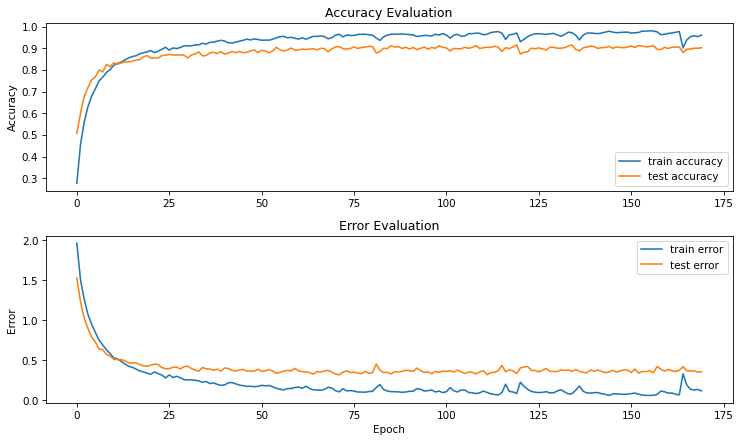

 Plots for Model 2


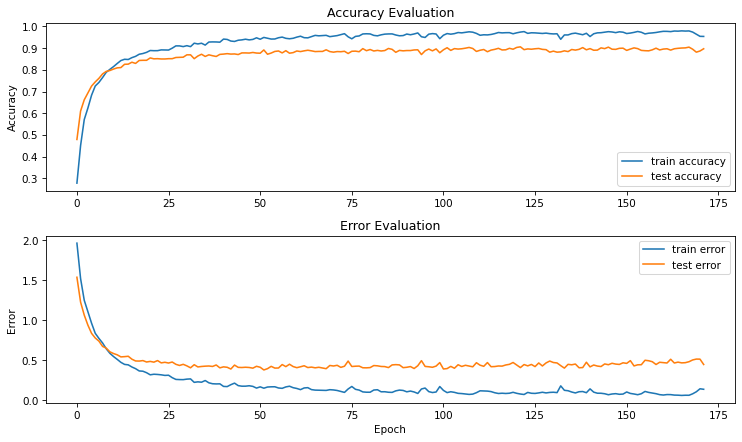

 Plots for Model 3


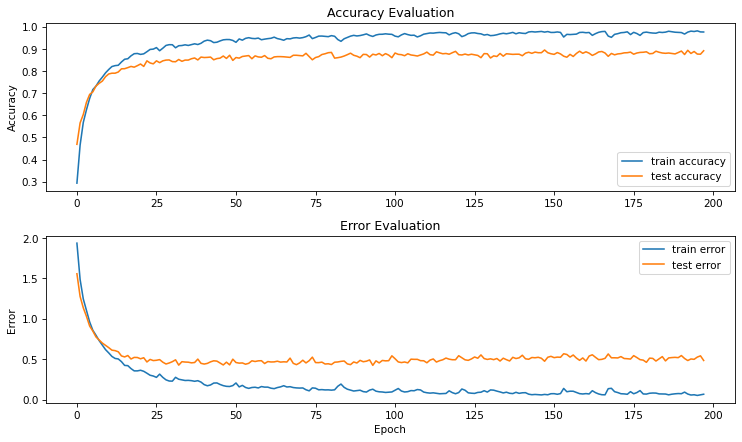

 Plots for Model 4


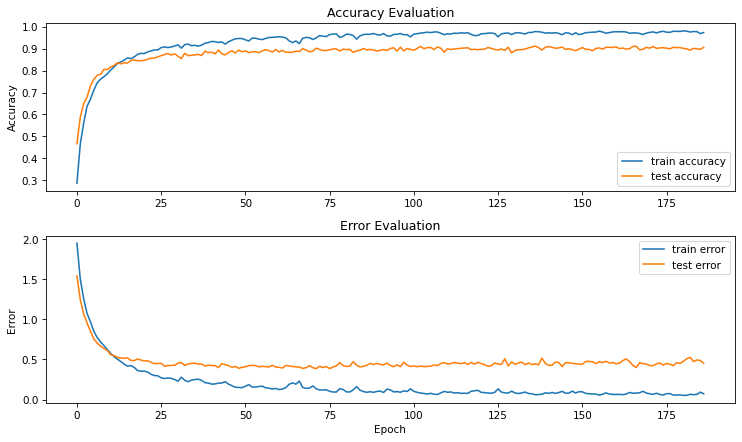

 Plots for Model 5


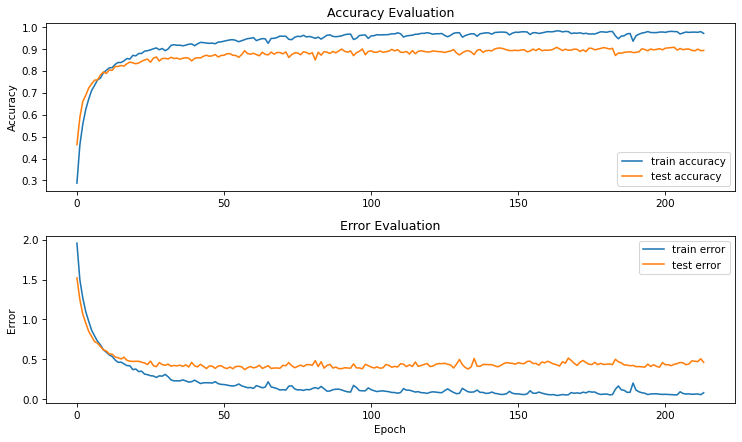

In [12]:
# plot accuracies and errors
kf.plot_histories()

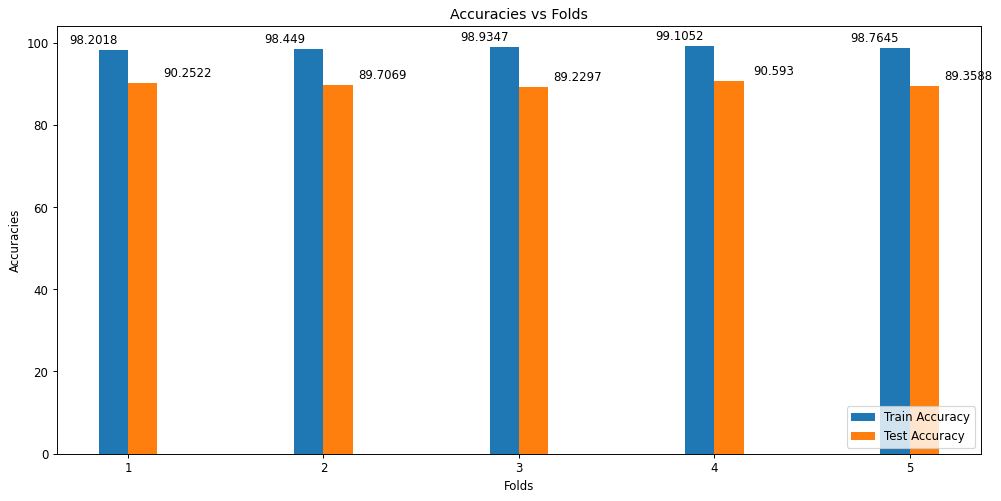

In [13]:
# accuracies of each fold
kf.plot_accuracies_vs_folds()

* Models are already saved, skip below.

In [ ]:
# save all folds (default path is for lstm)
kf.save_all_models(path="data_science/models/lstm_k_fold/saved_model_")

In [ ]:
# save best fold (here, fold 1)
kf.save_best_model(best_fold=1, path="data_science/models/lstm_k_fold/best_model")